---
title: Homework 01 Submission
date: 2025-01-12
authors:
  - name: Nico O'Neill 
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

In [95]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": True,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

# <span style="color: #ff5500">Question 1: Binomial Approximation</a>
The binomial approximation to first order in $x$ is as follows:
\begin{align}
(1 + x)^{n} \approx 1 + n x.
\end{align}

## <span style="color:#ccccff;">Question 1A</span>
Derive the binomial approximation using the Taylor Expansion to first order about $x = 0$

## <span style="color:#ccccff;">Question 1B</span>
Find the second and third order terms of the binomial approximation

## <span style="color:#ccccff;">Question 1C</span>
Plot the binomial function on $x \in [-1, 1]$ for $n = \dfrac{1}{2}$.\
Compare to plots of the first, second, and third order binomial approximation.\
At what $x > 0$ does each approximation fail, becoming greater than 5\% error?

## Question 1A Solution: <span style="color:#ff5555;">(This example filled out for you)</span>
Let $$f(x) = (1 + x)^n,$$ 
then at $x = 0$, $$f(0) = 1.$$
Then the first derivative $f'(x)$ is $$f'(x) = n (1 + x)^{n-1}$$
and the derivative evaluated at $x = 0$ is $$f'(0) = n$$

The Taylor Expansion to first order then becomes 
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x\\~\\
&= 1 + n x
\end{align}

## Question 1B Solution:
Taking the second and third derivatives, and evaluating at 0 yields
\begin{align}
f''(x) &= n (n-1) (1 + x)^{n-2} \\
f'''(x) &= n (n-1) (n-2) (1 + x)^{n-3} \\~\\
f''(0) &= n (n-1)\\
f'''(0) &= n (n-1) (n-2)
\end{align}

The second order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2
\end{align}

The third order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2 + \dfrac{1}{3!} f'''(0) x^3\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2 + \dfrac{1}{6} n (n-1) (n-2) x^3
\end{align}

In [96]:
def binom(xx:float, nn:float):
    """Binomial function (1 + xx)^nn
    
    Inputs:
    -------
    xx: float or array of floats
        binomial variable
    nn: float
        binomial exponent

    Output:
    -------
    binom: float or array of floats
        binomial expansion
    """
    return (1 + xx)**nn

In [97]:
# Parameter definitions.  Protip: never make single-letter variable names
nn = 0.5
xx = np.linspace(-1, 2, 100)

taylor0 = 1
taylor1 = taylor0 + nn * xx
taylor2 = taylor1 + 0.5 * nn * (nn - 1) * xx**2
taylor3 = taylor2 + (1/6) * nn * (nn - 1) * (nn - 2) * xx**3

In [98]:
# At which x does the error become greater than 10%?
# First, we divide the approximation by the real function,
# Second, we subtract 1 from that ratio
# Third, we take the absolute value of the subtraction
# Fourth, we look for the first location where the final result is greater than 0.1
# Fifth, we find where x > 0
# Sixth, we take the intersection of the indices found
# Seventh, we find the first index where the error is large for plotting
error = 0.05
model = binom(xx, nn)

xx_errors = np.array([])
for taylor in [taylor1, taylor2, taylor3]:
    abs_errors = np.abs(taylor/model - 1) # final result
    indices_error = np.argwhere(abs_errors > error)
    indices_x = np.argwhere(xx > 0)
    
    indices_final = np.intersect1d(indices_error, indices_x)
    index = indices_final[0]
    
    xx_errors = np.append(xx_errors, xx[index])
print(xx_errors)

[0.87878788 1.3030303  1.42424242]


/var/folders/bv/j6_kzrsd6tn7pb_yll4l7cl40000gn/T/ipykernel_75250/3003632814.py:14: RuntimeWarning: divide by zero encountered in divide
  abs_errors = np.abs(taylor/model - 1) # final result


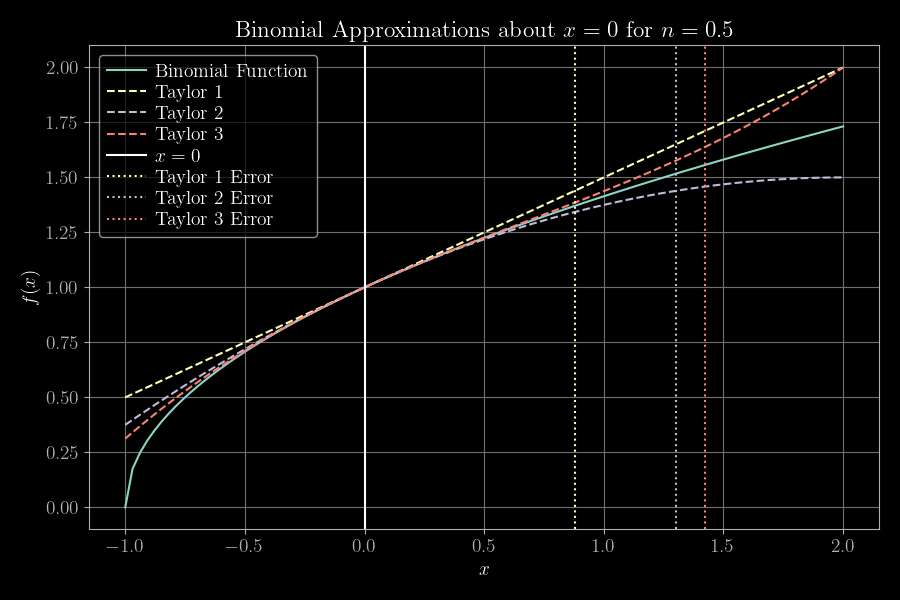

In [99]:
fig, s1 = plt.subplots(1)

s1.plot(xx, binom(xx, nn), label="Binomial Function")
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")
s1.plot(xx, taylor3, ls="--", label="Taylor 3")

s1.axvline(x=0, label=f"$x = 0$")

for ii, xx_error in enumerate(xx_errors):
    s1.axvline(x=xx_error, color=f"C{ii+1}",ls=":", label=f"Taylor {ii+1} Error")

s1.set_title("Binomial Approximations about $x = 0$ for $n = " + f"{nn}" + "$")
s1.set_xlabel("$x$")
s1.set_ylabel("$f(x)$")
s1.legend()
s1.grid()
plt.show()

# <span style="color: #ff5500">Question 2: Sine and Cosine Approximations</a>

## Question 2A: Sine 
Repeat the Taylor Expansion approximations for sine  to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.

## Question 2B: Cosine
Repeat the Taylor Expansion approximations for cosine to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.


## Question 2A Solution:
Let $$f(x) = \sin(x),$$ 
then at $x = 0$, $$f(0) = 0.$$
Then the first derivative $f'(x)$ is $$f'(x) = \cos(x)$$
and the derivative evaluated at $x = 0$ is $$f'(0) = 1$$

Taking the second derivative, and evaluating at 0 yields
\begin{align}
f''(x) &= -\sin(x) \\~\\
f''(0) &= 0\\
\end{align}

The Taylor Expansion to first order then becomes 
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\~\\
&= 0 + 1 x + \dfrac{1}{2} 0 x^2\\~\\
&= x
\end{align}

In [100]:
def sine(xx:float):
    """Sine function sin(xx)
    
    Inputs:
    -------
    xx: float or array of floats
        sine variable

    Output:
    -------
    sine: float or array of floats
        sine expansion
    """
    return np.sin(xx)

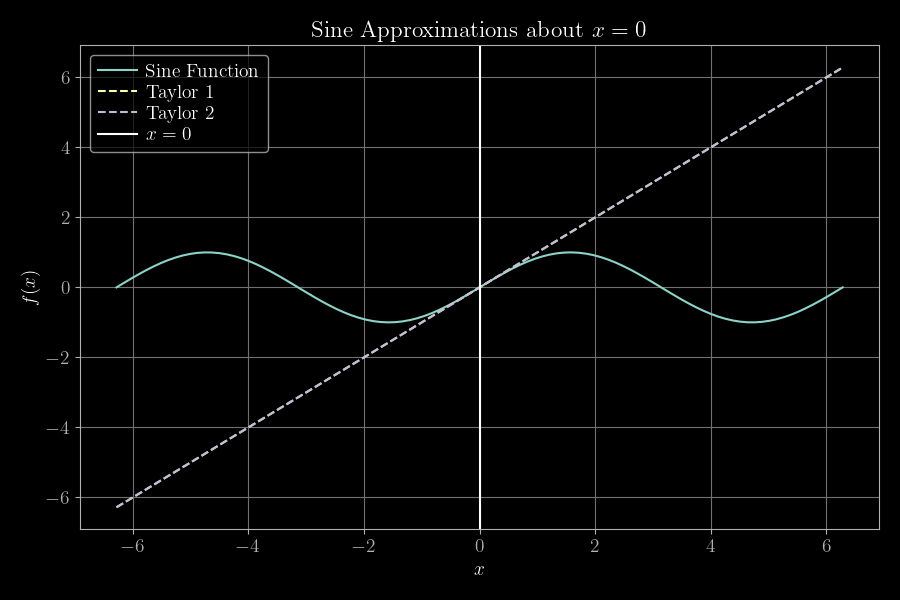

In [101]:
# Parameter definitions
xx = np.linspace(-2*np.pi, 2*np.pi, 100)

taylor0 = 0
taylor1 = taylor0 + xx
taylor2 = taylor1 + 0

fig, s1 = plt.subplots(1)

s1.plot(xx, sine(xx), label="Sine Function")
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")

s1.axvline(x=0, label=f"$x = 0$")

s1.set_title("Sine Approximations about $x = 0$")
s1.set_xlabel("$x$")
s1.set_ylabel("$f(x)$")
s1.legend()
s1.grid()
plt.show()

## Question 2B Solution:
Let $$f(x) = \cos(x),$$ 
then at $x = 0$, $$f(0) = 1.$$
Then the first derivative $f'(x)$ is $$f'(x) = -\sin(x)$$
and the derivative evaluated at $x = 0$ is $$f'(0) = 0$$

Taking the second derivative, and evaluating at 0 yields
\begin{align}
f''(x) &= -\cos(x) \\~\\
f''(0) &= -1\\
\end{align}

The Taylor Expansion to first order then becomes 
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\~\\
&= 1 + 0 x + \dfrac{1}{2} (-1) x^2\\~\\
&= 1 - \dfrac{1}{2} x^2
\end{align}

In [102]:
def cosine(xx:float):
    """Cosine function cos(xx)
    
    Inputs:
    -------
    xx: float or array of floats
        cosine variable

    Output:
    -------
    cosine: float or array of floats
        cosine expansion
    """
    return np.cos(xx)

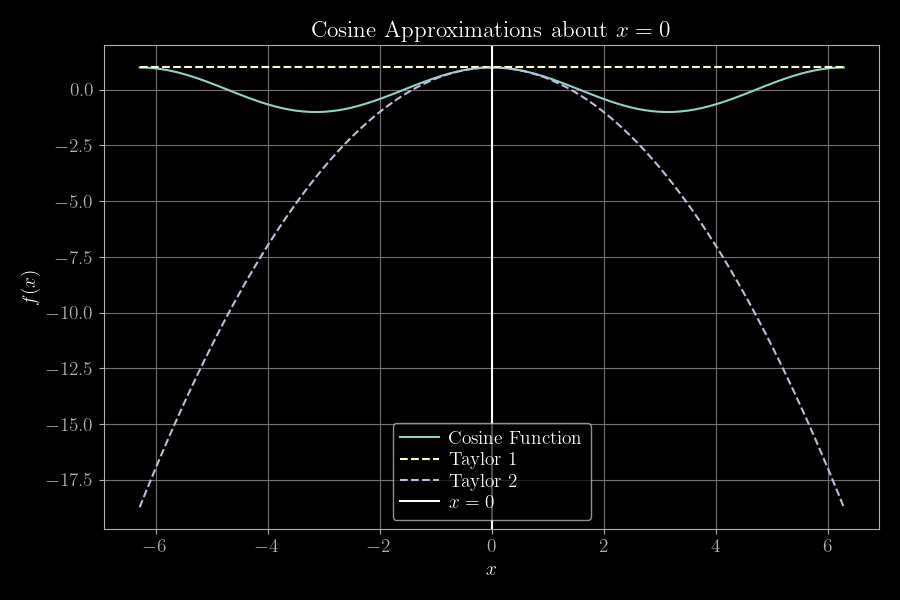

In [103]:
# Parameter definitions
xx = np.linspace(-2*np.pi, 2*np.pi, 100)

taylor0 = 1
taylor1 = taylor0 + 0
taylor2 = taylor1 - (xx**2) / 2

taylor0 = np.ones_like(xx)
taylor1 = np.ones_like(xx)

fig, s1 = plt.subplots(1)

s1.plot(xx, cosine(xx), label="Cosine Function")
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")

s1.axvline(x=0, label=f"$x = 0$")

s1.set_title("Cosine Approximations about $x = 0$")
s1.set_xlabel("$x$")
s1.set_ylabel("$f(x)$")
s1.legend()
s1.grid()
plt.show()

# <span style="color: #ff5500">Question 3: Complex Number Review</a>

## Question 3A:
Plot the following complex function on a domain of $\phi \in [0, 2 \pi]$:
\begin{align}
z_1(\phi) &= 2 + e^{i \phi}\\
z_2(\phi) &= \dfrac{3}{2 - e^{i \phi}}\\
z_3(\phi) &= e^{(\sigma + i \omega) t}
\end{align}
where for $z_4$, $\sigma = -0.5$, and $\omega = 1$.

## Question 3B:
Calculate the magnitude $r(\phi)$ and argument $\theta(\phi)$ for each $z_i$.

## Question 3C:
Calculate the velocity of the phasors with respect to $\phi$, and draw them for each $z_i$ evaluated at $\phi = \left\{0, \dfrac{\pi}{2}, \pi, \dfrac{3\pi}{2} \right\}$

## Question 3D:
What is the primary difference between $z_1$ and $z_2$?

## Question 3E:
For $z_3$, substitute $t$ for $\phi$, and calculate the normalized time derivatives : $\dfrac{\dot{z_3}}{z_3}$, $\dfrac{\ddot{z_3}}{z_3}$

and find expressions for the normalized real polar coordinates $\dfrac{\dot{r}}{r}, \dfrac{\ddot{r}}{r}, \dot{\theta}, \ddot{\theta}$.

Discuss how the expressions you found for the polar coordinates relate to the path you plotted for $z_3$ in part A.  

What happens if $\sigma = +0.5$?

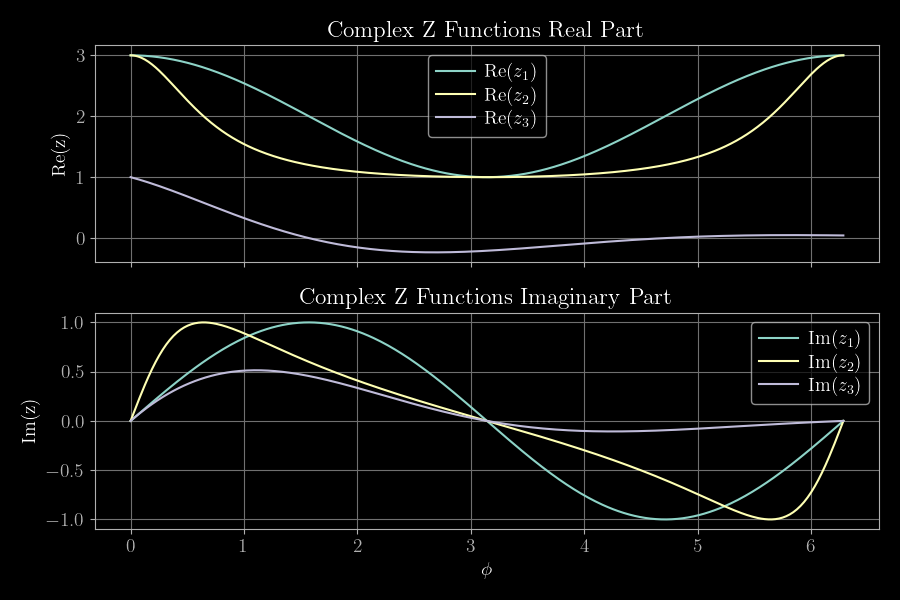

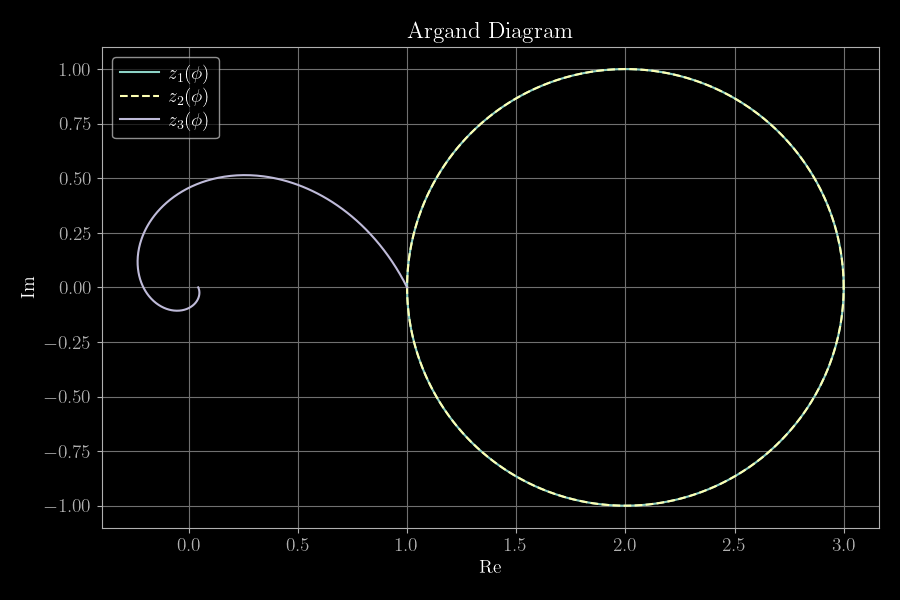

In [104]:
## Solution to 3A

# Parameter definitions
phi = np.linspace(0, 2*np.pi, 400)
sigma = -0.5
omega = 1

# Function Definitions
z1 = 2 + np.exp(1j * phi)
z2 = 3 / (2 - np.exp(1j * phi))
z3 = np.exp((sigma + 1j * omega) * phi)

fig, (s1, s2) = plt.subplots(2, 1, sharex=True)

# Real 
s1.plot(phi, np.real(z1), label="Re($z_1$)")
s1.plot(phi, np.real(z2), label="Re($z_2$)")
s1.plot(phi, np.real(z3), label="Re($z_3$)")

s1.set_title("Complex Z Functions Real Part")
s1.set_ylabel("Re(z)")
s1.grid(True)
s1.legend()

# Imaginary
s2.plot(phi, np.imag(z1), label="Im($z_1$)")
s2.plot(phi, np.imag(z2), label="Im($z_2$)")
s2.plot(phi, np.imag(z3), label="Im($z_3$)")

s2.set_title("Complex Z Functions Imaginary Part")
s2.set_xlabel("$\\phi$")
s2.set_ylabel("Im(z)")
s2.grid(True)
s2.legend()

plt.show()

fig, ax = plt.subplots()

ax.plot(np.real(z1), np.imag(z1), label="$z_1(\\phi)$")
ax.plot(np.real(z2), np.imag(z2), ls="--", label="$z_2(\\phi)$")
ax.plot(np.real(z3), np.imag(z3), label="$z_3(\\phi)$")

ax.set_aspect("equal", adjustable="box")
ax.set_title("Argand Diagram")
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.grid(True)
ax.legend()
plt.show()


## Question 3B Solution:
Recalling $$e^{i\phi} = \cos(\phi) + i\sin(\phi).$$
Starting with $$z_1(\phi) = 2 + e^{i \phi},$$
\begin{align}
z_1(\phi) &= 2 + \cos(\phi) + i\sin(\phi) \\
r_1(\phi) &= \sqrt{(2 + \cos(\phi))^2 + (\sin(\phi))^2} \\ 
&= \sqrt{4 + 2\cos(\phi) + \cos^2(\phi) + \sin^2(\phi)} \\
&= \sqrt{5 + 2\cos(\phi)}\\
\theta_1(\phi) &= \arctan2(\sin(\phi), 2 + \cos(\phi))
\end{align}
For $$z_2(\phi) = \dfrac{3}{2 - e^{i \phi}},$$
\begin{align}
z_2(\phi) &= \dfrac{3}{2 - \cos(\phi) - i\sin(\phi)} \\
r_2(\phi) &= \dfrac{3}{\sqrt{(2 - \cos(\phi))^2 + (\sin(\phi)})^2} \\ 
&= \dfrac{3}{\sqrt{5 - 4\cos(\phi)}}\\
\theta_2(\phi) &= -\arg(2 - e^{i\phi})\\
&= \arctan2(\sin(\phi), 2-\cos(\phi))
\end{align}
For $$z_3(\phi) &= e^{(\sigma + i \omega) \phi},$$
\begin{align}
z_3(\phi) &= e^{(\sigma\phi + i \omega\phi)}\\
&= e^{(\sigma\phi)} e^{(i \omega\phi)}\\
&= e^{(\sigma\phi)}(\cos(\omega\phi) + i \sin(\omega\phi)) \\
r_3(\phi) &= \sqrt{(e^{(\sigma\phi)}\cos(\omega\phi))^2 + (e^{(\sigma\phi)}\sin(\omega\phi))^2} \\ 
&= \sqrt{(e^{(\sigma\phi)})^2} \\
&= e^{(\sigma\phi)} \\
\theta_3(\phi) &= \tan^{-1}(\dfrac{e^{(\sigma\phi)}\sin(\omega\phi)}{e^{(\sigma\phi)}\cos(\omega\phi)}) \\
&= \tan^{-1}(\tan(\omega\phi)) \\
&= \omega\phi
\end{align}

## Question 3C Solution:
To find the velocity vectors, we will differentiate the $z_n$ functions with respect to $\phi$.
\begin{align}
z_1(\phi) &= 2 + e^{i \phi}\\
v_1(\phi) &= \dfrac{dz_1}{d\phi} \\
&= i e^{i \phi} \\
z_2(\phi) &= \dfrac{3}{2 - e^{i \phi}}\\
v_2(\phi) &= \dfrac{dz_2}{d\phi} \\
&= \dfrac{3ie^{i\phi}}{(2 - e^{i \phi})^2} \\
z_3(\phi) &= e^{(\sigma + i \omega) \phi}\\
v_3(\phi) &= \dfrac{dz_3}{d\phi} \\
&= (\sigma + i \omega)e^{(\sigma + i \omega) \phi}
\end{align}

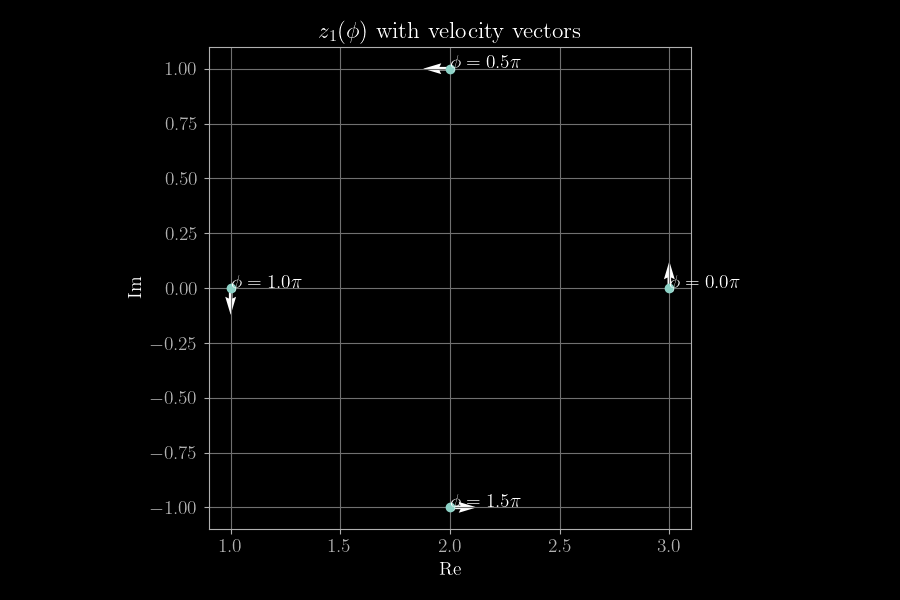

In [105]:
# Parameter Definitions
sigma = -0.5
omega = 1.0
phis = np.array([0, np.pi/2, np.pi, 3*np.pi/2])

# Z Functions
def z1(phi): 
    return 2 + np.exp(1j*phi)
def v1(phi): 
    return 1j*np.exp(1j*phi)

def z2(phi): 
    return 3/(2 - np.exp(1j*phi))
def v2(phi):
    den = (2 - np.exp(1j*phi))
    return 3*(1j*np.exp(1j*phi))/den**2

def z3(phi): 
    return np.exp((sigma + 1j*omega)*phi)
def v3(phi): 
    return (sigma + 1j*omega)*z3(phi)

def plot_phasor(zz, vv, title, scale=1.0):
    z = zz(phis)
    v = vv(phis)

    fig, ax = plt.subplots()
    ax.plot(np.real(z), np.imag(z), "o") #phasor plot

    # velocity arrows
    ax.quiver(np.real(z), np.imag(z),
              np.real(v), np.imag(v),
              angles="xy", scale_units="xy", scale=None,
              color="white")

    # label phis
    for p, zz in zip(phis, z):
        ax.text(np.real(zz), np.imag(zz), rf"  $\phi={p/np.pi:.1f}\pi$")

    ax.set_title(title)
    ax.set_xlabel("Re")
    ax.set_ylabel("Im")
    ax.grid(True)
    ax.set_aspect("equal", adjustable="box")
    plt.show()

plot_phasor(z1, v1, r"$z_1(\phi)$ with velocity vectors")


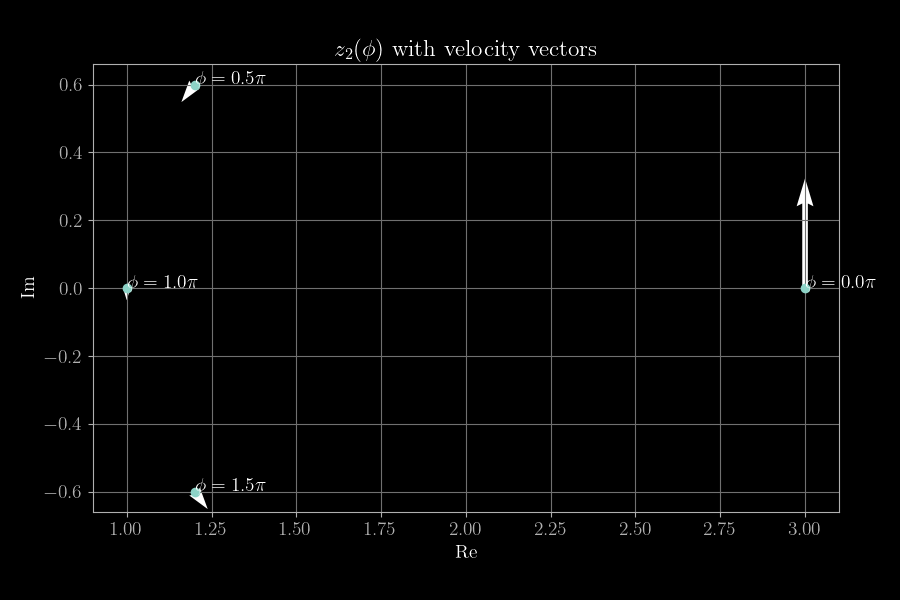

In [106]:
plot_phasor(z2, v2, r"$z_2(\phi)$ with velocity vectors")

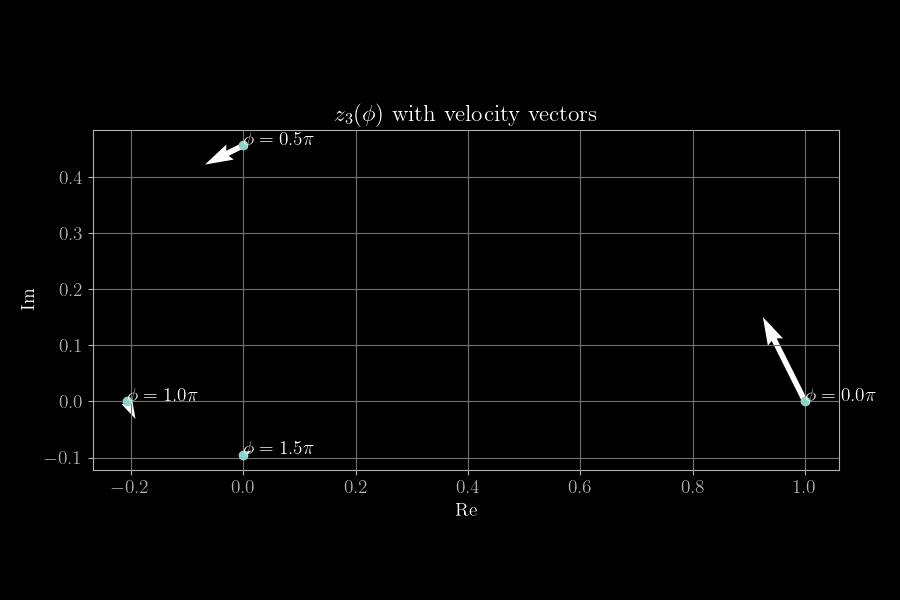

In [107]:
plot_phasor(z3, v3, r"$z_3(\phi)$ with velocity vectors")

## Question 3D Solutions:
$z_1$ follows a circle of radius 1, centered at 2 and maintains a constant speed, meaning that the velocity vectors are all the same size and perpendicular to the radius. \
$z_2$ follows a warped circle and the magnitude and direction of the velocity depend upon $\phi$ meaning that it is also warped when compared to $z_1$.

## Question 3E Solutions:
Take $$z_3(t) &= e^{(\sigma + i \omega) t},$$

\begin{align}
\dot{z_3}(t) &= (\sigma + i \omega)e^{(\sigma + i \omega) t}\\
&=(\sigma + i \omega)z_3(t)\\
\dfrac{\dot{z_3}(t)}{z_3(t)} &= \sigma + i \omega\\
\ddot{z_3}(t) &= (\sigma + i \omega)^2 e^{(\sigma + i \omega) t}\\
\dfrac{\ddot{z_3}(t)}{z_3(t)} &= (\sigma + i \omega)^2\\
\end{align}
Now we can find the polar forms,
\begin{align}
r_3(t) &= e^{(\sigma t)}\\
\theta_3(t)&= \omega t \\
\dot{r_3}(t) &= \sigma e^{(\sigma t)}\\
\dfrac{\dot{r_3}(t)}{r_3(t)} &= \sigma\\
\ddot{r_3}(t) &= \sigma^2 e^{(\sigma t)}\\
\dfrac{\ddot{r_3}(t)}{r_3(t)} &= \sigma^2\\
\dot{\theta_3(t)} &= \omega\\
\ddot{\theta_3(t)} &= 0\\
\end{align}
This relates to our plot because we can that our point is rotating with a constant speed, but our radius is changing exponentially based on $\sigma$. This is the source of the spiral we see on the Argand diagram. When $\sigma = 0.5$, we see exponential growth rather than decay. 

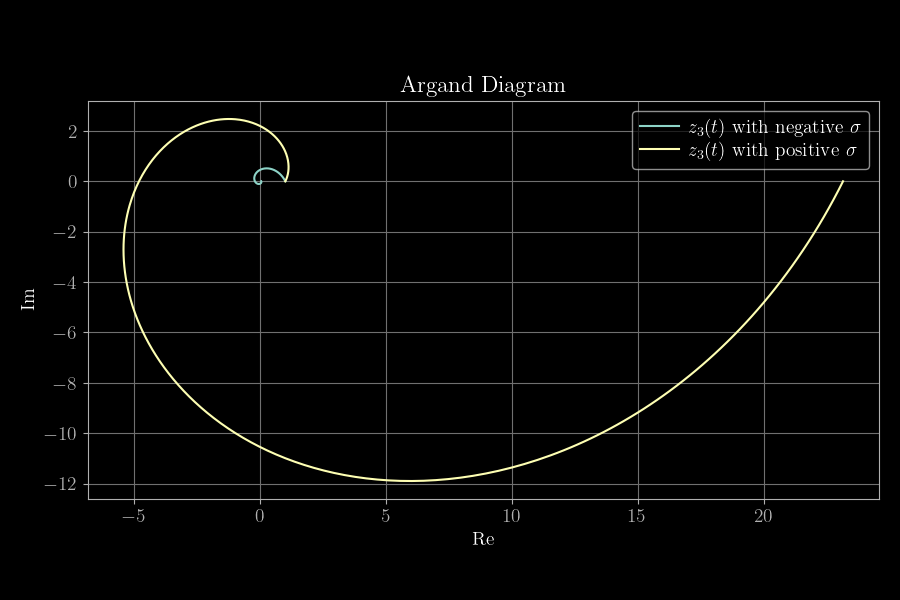

In [108]:
# Parameter definitions
t = np.linspace(0, 2*np.pi, 400)
sigma = -0.5
omega = 1

z3_n = np.exp((sigma + 1j * omega) * t)

sigma = 0.5
z3_p = np.exp((sigma + 1j * omega) * t)

fig, ax = plt.subplots()

ax.plot(np.real(z3_n), np.imag(z3_n), label=r"$z_3(t)$ with negative $\sigma$")
ax.plot(np.real(z3_p), np.imag(z3_p), label=r"$z_3(t)$ with positive $\sigma$")

ax.set_aspect("equal", adjustable="box")
ax.set_title("Argand Diagram")
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.grid(True)
ax.legend()
plt.show()

# <span style="color: #ff5500">Question 4: Electric field propogating in 2D</a>
In class, we assumed that an plane wave was propogating in the $\hat{k} = \hat{z}$ direction, with the electric field oscillating in the $\hat{x}$ direction.\
Suppose now that the is oscillating in the $\dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})$ direction: 
\begin{align}
\boldsymbol{E} = E_0 \cos(\vec{k} \cdot \vec{r} - \omega t) \dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})
\end{align}

## Question 4A:
What direction of propogation $\hat{k}$ and magnetic field vector $\boldsymbol{B}$ are now possible?\
Draw a diagram of the electric field vector and the plane of propogation.

## Question 4B:
What are the expressions for $\hat{k}$ and $\boldsymbol{B}$ if we constrain the direction of propogating to be (partially) in the positive $\hat{x}$ direction? 

## Question 4A Answer:

The $\hat{k}$ vector must be perpendicular to the E-field. This means it can still live in the $\hat{z}$ direction, or it can be $$\dfrac{1}{\sqrt{2}}(\hat{x}-\hat{y}).$$\
The $B$ field must go in the $\hat{k} \times \hat{e}$ direction. For $\hat{k} = \hat{z},$\
$$\dfrac{1}{\sqrt{2}}(\hat{y}-\hat{x}).$$
For $\hat{k} = \dfrac{1}{\sqrt{2}}(\hat{x}-\hat{y}),$\
$$\hat{z}.$$

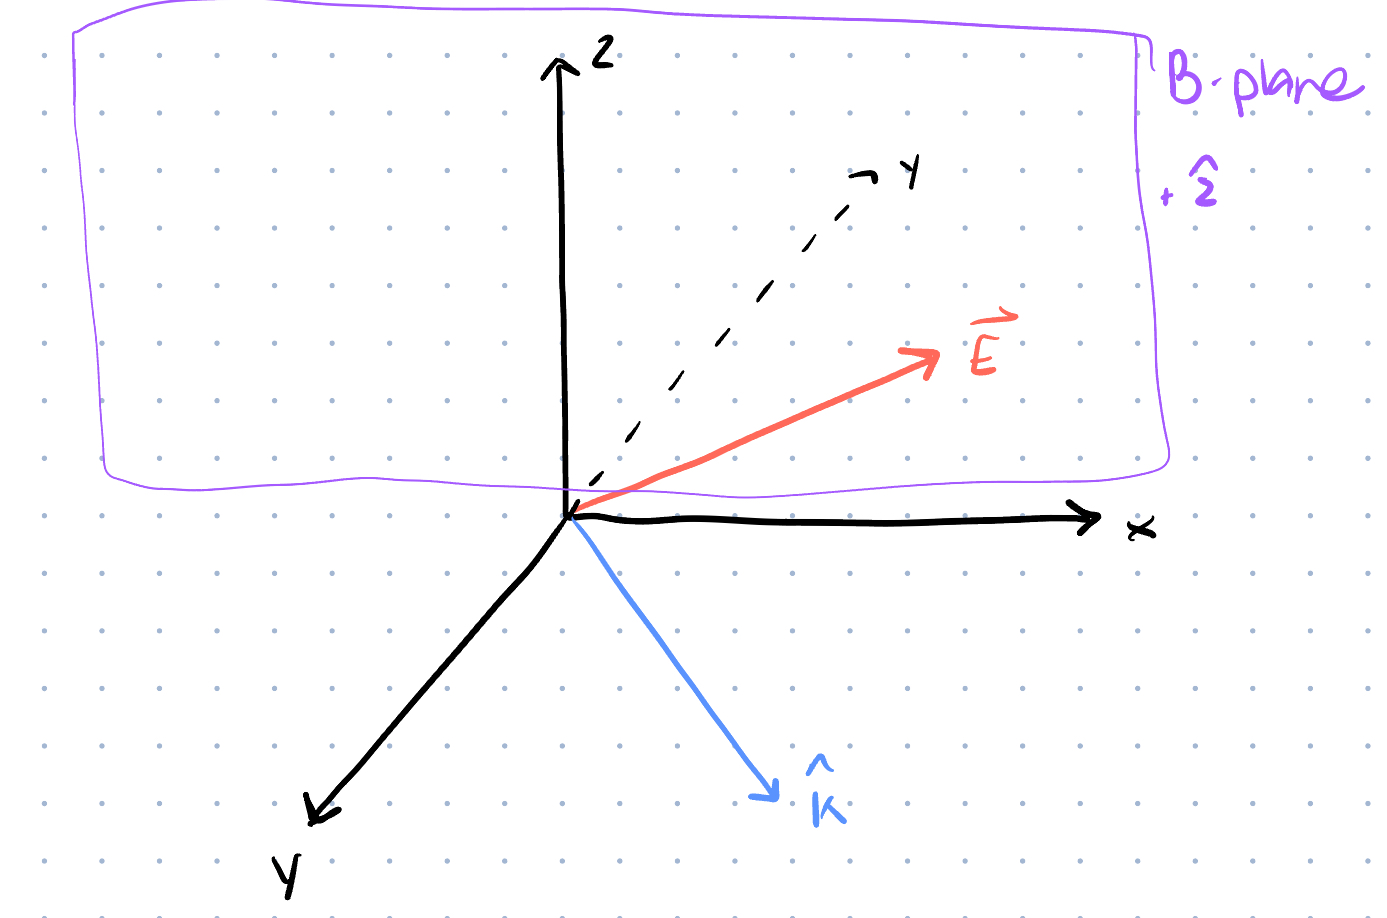

## Question 4B Answer:

We find that the x-component of $\hat{k}$ is $$\dfrac{1}{\sqrt(2)}\cos(\alpha).$$ 
If we require a positive $\hat{x}$, then $-\dfrac{\pi}{2}\lt\alpha\lt\dfrac{\pi}{2}$.
The full expression for $\hat{k}$ is $$\dfrac{1}{\sqrt(2)}\cos(\alpha)\hat{x}-\dfrac{1}{\sqrt(2)}\cos(\alpha)\hat{y}+\sin(\alpha)\hat{z}.$$
The expression for B is $$B=\dfrac{E_0}{c}\cos(k\cdot r-\omega t)[\cos(\alpha)\hat{z}-\dfrac{\sin(\alpha)}{\sqrt{2}}(\hat{x}-\hat{y})].$$

# <span style="color: #ff5500">Question 5: Spherical Plane Wave Intensity and Radiation Pressure</a>

Suppose you have a sinusoidal spherical plane wave source a distance $d$ away along the $\hat{z}$ axis from a cylindrical mirror with radius $a$.\
Use the center of the spherical wave as the origin, and the distance from that center as the variable $r$.\
Assume that the cylinder is in the $xy$ plane.\
Also assume that the spherical wave is emitting total power $P_\mathrm{total}$ in all directions.


## Question 5A:
What is the Poynting vector $\boldsymbol{S}$ for the spherical waves?\
*Hint: Equation 9.49 of Griffith's E&M may be helpful here*

## Question 5B:
What is the Poynting vector $\boldsymbol{S}$ incident on the mirror center?\
What about the mirror edge?\
Write an expression for the Poynting vector incident anywhere on the mirror's surface.

## Question 5C:
Using your result from Question 5B, find the intensity $I$ incident on the mirror.

## Question 5D:
Find the total power $P$ incident on the mirror.\
Compare to the total power emitted by the spherical plane wave.

## Question 5E: 
Calculate the radiation pressure $p_\mathrm{rad}$ incident on the mirror.\
Also find the radiation pressure force $F_\mathrm{rad}$.\
Assume the mirror is a perfect reflector.\
If the mirror has a mass $m$, what is its acceleration?

## Question 5A Solution:
The poynting vector for spherical waves is $$\boldsymbol{S} &=  c \epsilon_0 E_0^2 \cos(k z - \omega t)^2 \, \hat{z}.$$

## Question 5B Solution:

Assuming the mirror is at $z=0,$
\begin{align}
S(0, t) &= c \epsilon_0 E_0^2 \cos(- \omega t)^2 \, \hat{z} \\
&= c \epsilon_0 E_0^2 \cos(\omega t)^2 \, \hat{z}\\
\end{align}
due to symmetrical $\cos$. At the edge of a mirror the equation is the same, since the equation does not depend on the x/y position of the vector. 

## Question 5C Solution:

The only term that depends on $\omega$ is the $\cos(\omega t)^2$ term, and averaged over 1 period that becomes $\dfrac{1}{2}.$ So the intensity is $$I = \dfrac{1}{2} c \epsilon_0 E_0^2$$

## Question 5D Solution:
The power is just the intensity over the area of the mirror, $$P =  \dfrac{1}{2} c \epsilon_0 E_0^2 \pi R^2$$

## Question 5E Solution:

\begin{align}
p_{rad} &= \dfrac{2I}{c} \\
&= \epsilon_0 E_0^2 \\
F_{rad} &= \dfrac{2P}{c} \\
&= \epsilon_0 E_0^2 \pi R^2 \\
a &= \dfrac{F_{rad}}{m} \\
&= \dfrac{\epsilon_0 E_0^2 \pi R^2}{m}
\end{align}